In [4]:
import pandas as pd  # pandas is like Excel for Python

url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

df.head()  # Shows the first 5 rows of data


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Fill missing Age values with average age
df['Age'].fillna(df['Age'].mean(), inplace=True)

# Drop rows where 'Embarked' is missing
df.dropna(subset=['Embarked'], inplace=True)

# Remove unnecessary columns
df.drop(columns=['Cabin', 'Name', 'Ticket'], inplace=True)

# Convert text to numbers for 'Sex'
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# Convert 'Embarked' into numbers
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

df.head()


/tmp/ipython-input-5-425550729.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,1,0,3,0,22.0,1,0,7.2500,False,True
1,2,1,1,1,38.0,1,0,71.2833,False,False
2,3,1,3,1,26.0,0,0,7.9250,False,True
3,4,1,1,1,35.0,1,0,53.1000,False,True
4,5,0,3,0,35.0,0,0,8.0500,False,True


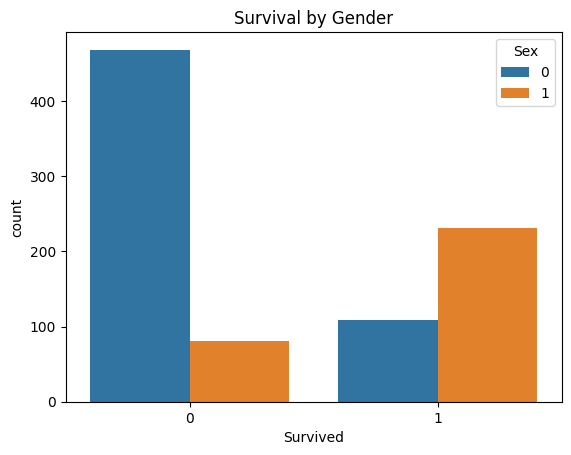

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Survived', hue='Sex', data=df)
plt.title("Survival by Gender")
plt.show()


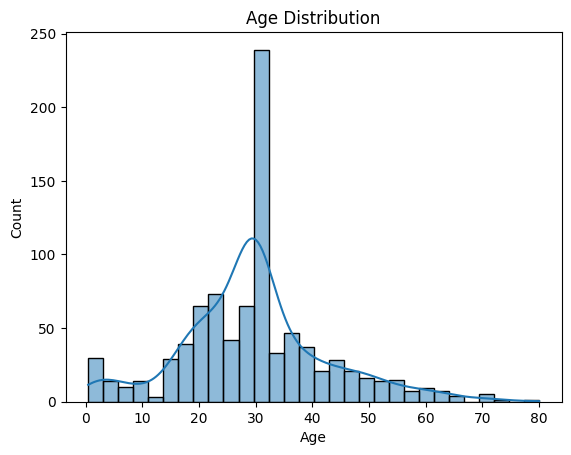

In [7]:
sns.histplot(df['Age'], kde=True)
plt.title("Age Distribution")
plt.show()


Females had a much higher survival rate than males.

Children and younger passengers had slightly better chances of survival.

Passengers in 1st class had better survival rates than those in 2nd or 3rd class.

Most passengers boarded from Southampton (Embarked = S).

Missing values in Age were filled with the mean; missing Embarked entries were dropped.

Unnecessary columns like Name, Ticket, and Cabin were removed for cleaner analysis.

'Sex' column was converted to numeric (male = 0, female = 1).

Embarked column was converted using one-hot encoding for better analysis.

Visualizations showed strong survival patterns based on gender, class, and age.

Overall, survival chances were most influenced by gender, class, and age.
